##### Importando as bibliotecas para conseguir realizar o desafio

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

##### Usando a biblioteca Pandas para ler o arquivo CSV 

In [188]:
df = pd.read_csv('googleplaystore.csv')

##### Usando o head() para vizualizar um pouco do arquivo 

In [189]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Tem um valor que não deveria estar nessa coluna, pois ele é da coluna Type, então removi esse valor

In [190]:
mascara = df['Installs'] == 'Free'
print(df.loc[mascara])
df = df.drop(10472)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


##### Na coluna Rating tem alguns valores que estão assim 1. e outros assim 1.6, então eu acrescentei o 0 nos valores que esta assim 1. e coloquei 0.0 nos valores nan

In [191]:
df['Rating'] = df['Rating'].replace('nan', 0.0)
df['Rating'] = df['Rating'].apply(lambda x: '{:.1f}'.format(x))

##### Fiz uma função que limpa os valores da coluna Installs removendo vírgulas e sinais de mais e converte os valores para inteiros

In [192]:
def converte_coluna_para_int(valor):
    return int(valor.replace(',','').replace('+',''))

df['Installs'] = df['Installs'].apply(converte_coluna_para_int)

##### Usando o drop_duplicates() eu removo as linhas duplicadas no DataFrame, considerando apenas a coluna 'App' como referência para identificar duplicados.

In [193]:
df = df.drop_duplicates(subset='App', keep='first')


##### Criando o gráfico de barras contendo os top 5 apps por número de instalação

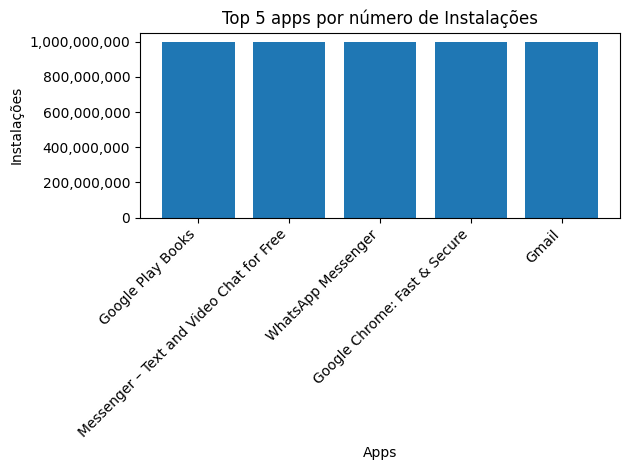

In [194]:
top_apps =  df.nlargest(5, 'Installs')

plt.bar(top_apps['App'], top_apps['Installs'])

plt.xlabel('Apps')
plt.ylabel('Instalações')
plt.xticks(rotation=45,ha='right')
plt.title('Top 5 apps por número de Instalações')

plt.gca().yaxis.set_major_formatter(lambda x, _: '{:,.0f}'.format(x))

plt.tight_layout()
plt.show()

##### Criando o gráfico de pizza mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem

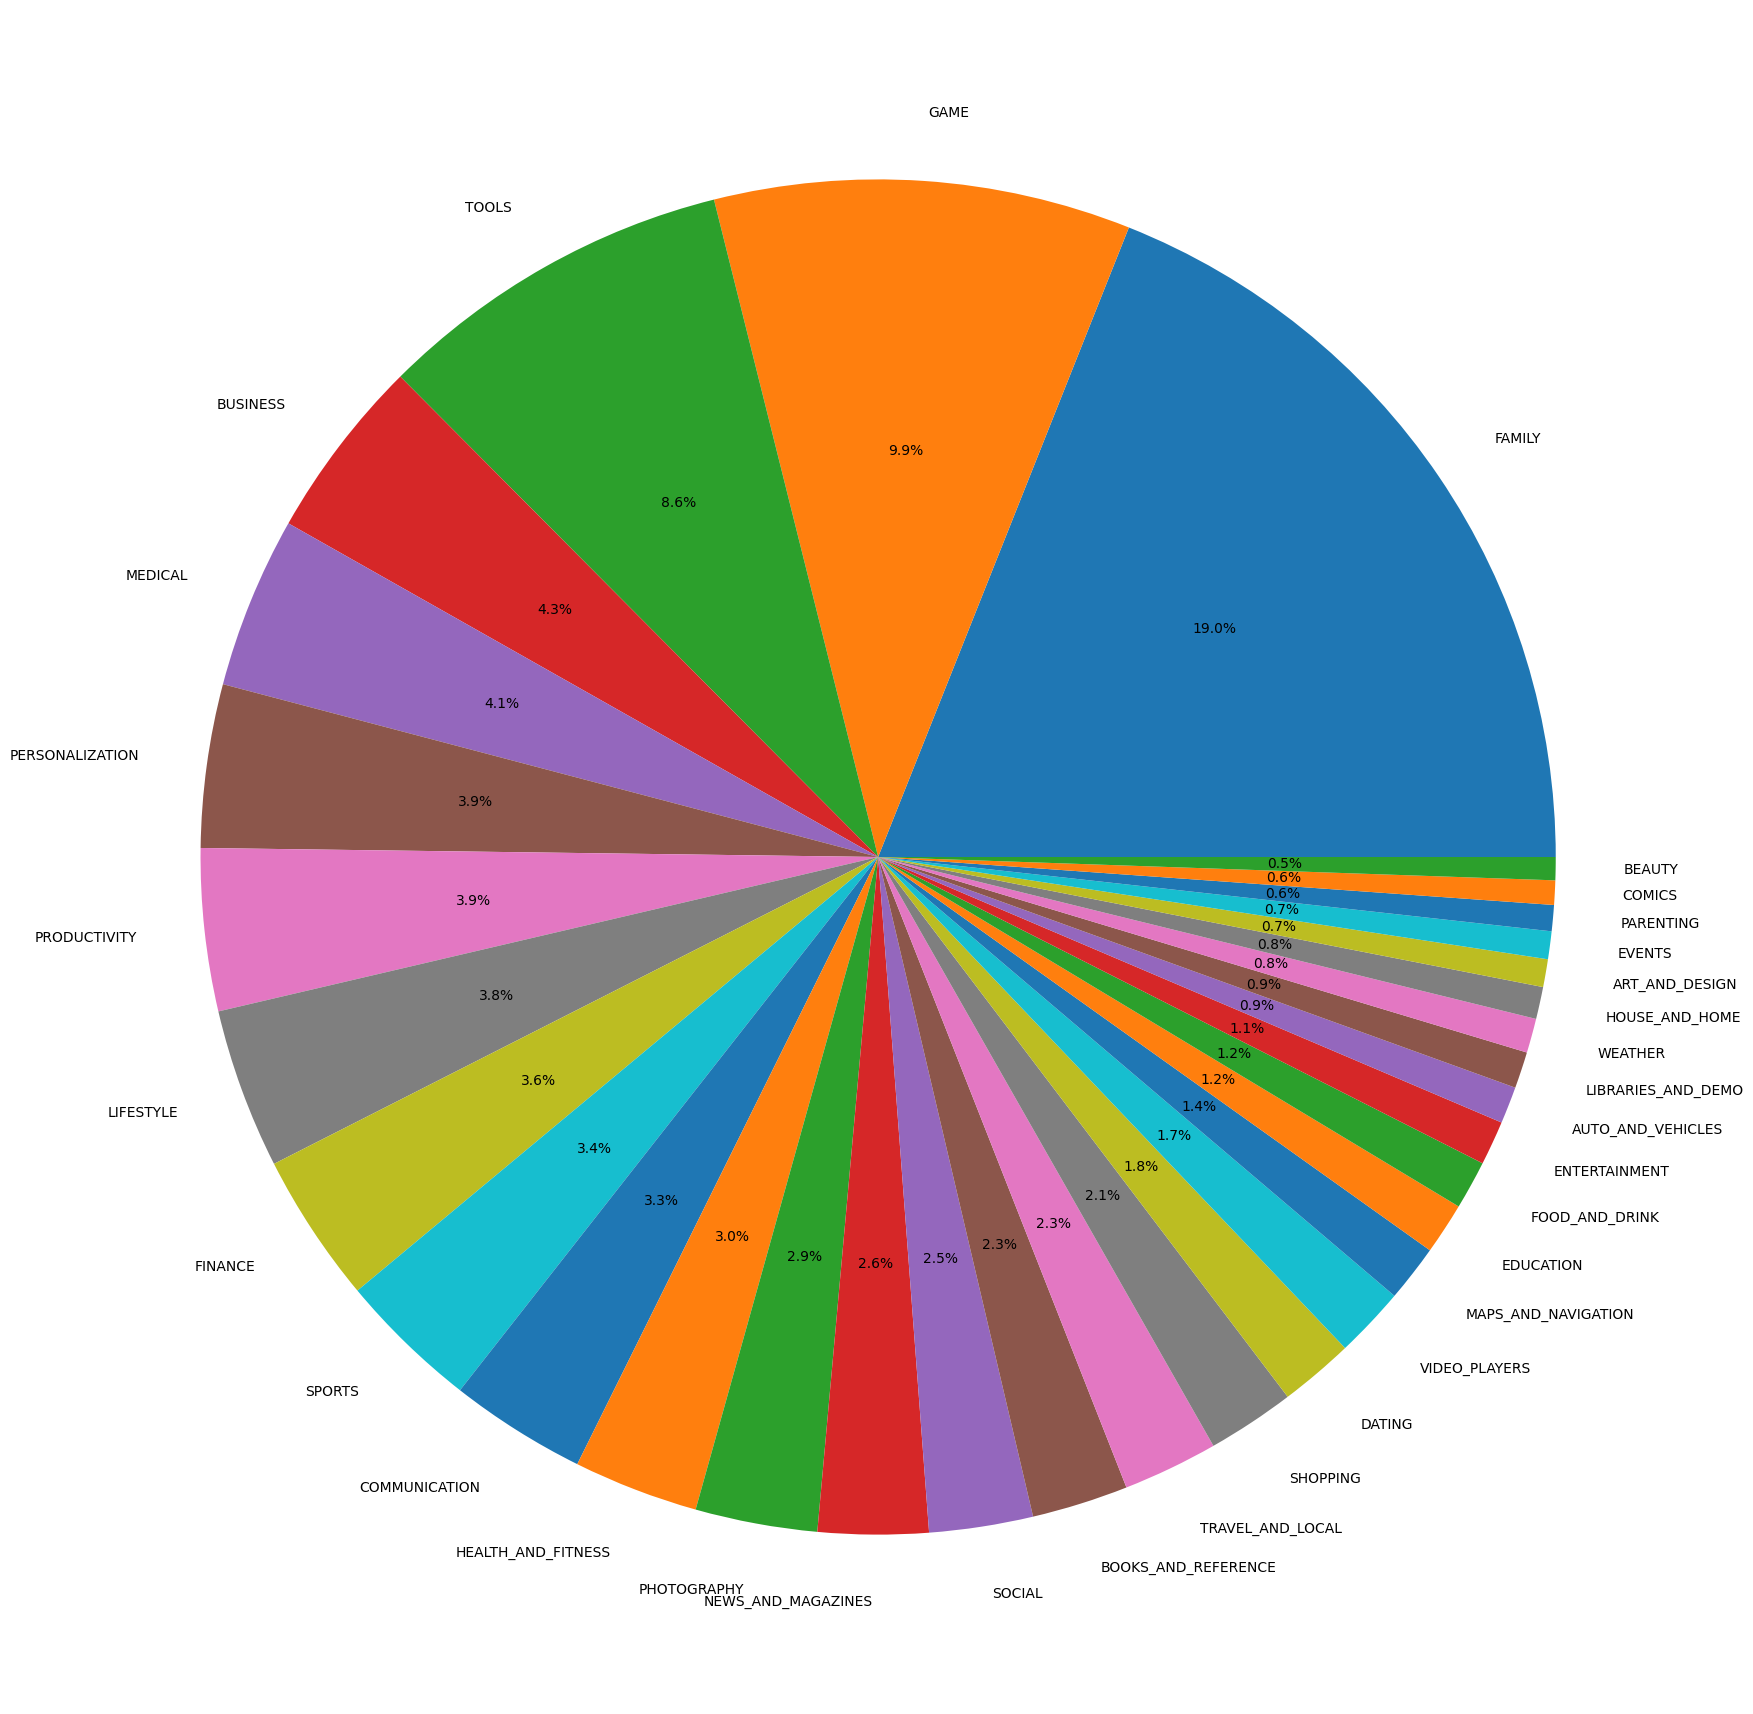

In [195]:
count = df['Category'].value_counts()

labels = count.index.tolist()
sizes = count.tolist()
plt.figure(figsize=(32, 22))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

##### Mostrando qual o app mais caro existente do dataset

##### Antes de localizar o app mais caro eu converti a coluna Price para float, assim eu consigo usar a função max()

In [196]:
def converte_preco_para_float(valor):
    if isinstance(valor, str):
        return float(valor.replace('$', '')) 
    else:
        return valor 

df['Price'] = df['Price'].apply(converte_preco_para_float)

app_mais_caro = df.loc[df['Price'] == df['Price'].max()]
print(app_mais_caro.to_string())

                           App   Category Rating Reviews  Size  Installs  Type  Price Content Rating     Genres Last Updated Current Ver Android Ver
4367  I'm Rich - Trump Edition  LIFESTYLE    3.6     275  7.3M     10000  Paid  400.0       Everyone  Lifestyle  May 3, 2018       1.0.1  4.1 and up


##### Mostrando a quantidade de apps que são classificados como 'Mature 17+'

In [197]:
quantidade_mature_17 = (df['Content Rating'] == 'Mature 17+').sum()
print(f'A quantidade de apps classificados como mature 17+ é: {quantidade_mature_17}')

A quantidade de apps classificados como mature 17+ é: 393


##### Mostrando o top 10 apps por número de reviews

##### Mas antes eu converti a coluna para o tipo numérico

In [198]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

top_10_reviews = df.nlargest(10, 'Reviews')
top_10_reviews = top_10_reviews.sort_values(by='Reviews', ascending=False)
for i, (app, quantidade) in enumerate(zip(top_10_reviews['App'], top_10_reviews['Reviews'])):
    print(f'{i + 1} - {app}: {quantidade}')


1 - Facebook: 78158306
2 - WhatsApp Messenger: 69119316
3 - Instagram: 66577313
4 - Messenger – Text and Video Chat for Free: 56642847
5 - Clash of Clans: 44891723
6 - Clean Master- Space Cleaner & Antivirus: 42916526
7 - Subway Surfers: 27722264
8 - YouTube: 25655305
9 - Security Master - Antivirus, VPN, AppLock, Booster: 24900999
10 - Clash Royale: 23133508


##### Mostrando a média de avaliação por faixa etária

##### Mas antes eu converti a coluna para numérico

In [199]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

media_avaliacao_por_faixa_etaria = df.groupby('Content Rating')['Rating'].mean()
for faixa_etaria, media in media_avaliacao_por_faixa_etaria.items():
    print(f"A média da faixa etária {faixa_etaria} é de {round(media,2)}")

A média da faixa etária Adults only 18+ é de 4.3
A média da faixa etária Everyone é de 4.17
A média da faixa etária Everyone 10+ é de 4.23
A média da faixa etária Mature 17+ é de 4.12
A média da faixa etária Teen é de 4.23
A média da faixa etária Unrated é de 4.1


##### Mostrando top 10 apps com melhor avaliação em ordem alfabética

In [200]:
top_10_melhores_apps = df.nlargest(10, 'Rating')
top_10_melhores_apps = top_10_melhores_apps.sort_values(by='App')
for i, (app, rating) in enumerate(zip(top_10_melhores_apps['App'], top_10_melhores_apps['Rating'])):
    print(f'{i + 1} - {app}: {rating}')

1 - American Girls Mobile Numbers: 5.0
2 - Awake Dating: 5.0
3 - Girls Live Talk - Free Text and Video Chat: 5.0
4 - Hojiboy Tojiboyev Life Hacks: 5.0
5 - Mindvalley U Tallinn 2018: 5.0
6 - Online Girls Chat Group: 5.0
7 - Prosperity: 5.0
8 - SUMMER SONIC app: 5.0
9 - Speeding Joyride & Car Meet App: 5.0
10 - Spine- The dating app: 5.0


##### Mostrando o gráfico de linha da média de avaliação por faixa etária

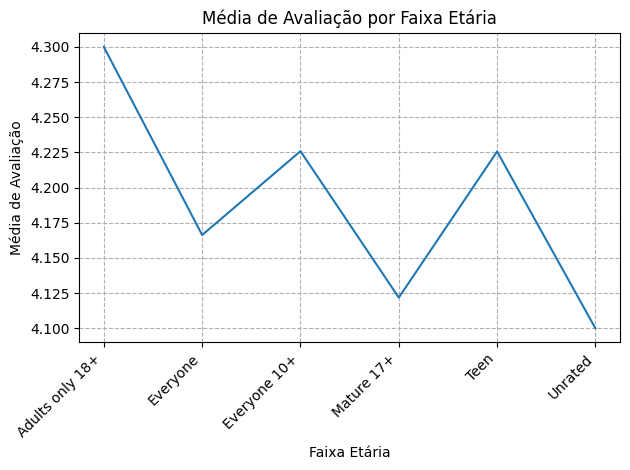

In [201]:
plt.plot(media_avaliacao_por_faixa_etaria.index, media_avaliacao_por_faixa_etaria.values)
plt.title('Média de Avaliação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

##### Mostrando o gráfico de dispersão com os top 10 apps com melhor avaliação

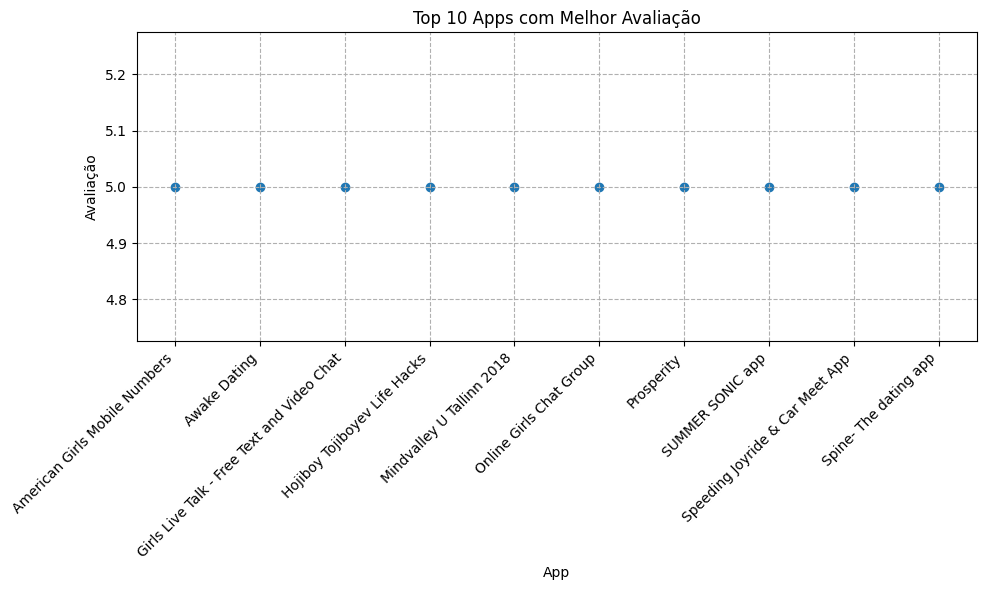

In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_melhores_apps['App'], top_10_melhores_apps['Rating'])
plt.title('Top 10 Apps com Melhor Avaliação')
plt.xlabel('App')
plt.ylabel('Avaliação')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

##### Achei que o gráfico acima, fica meio confuso, então fiz esse outro gráfico de barras horizontal com os top 10 apps com melhor avaliação

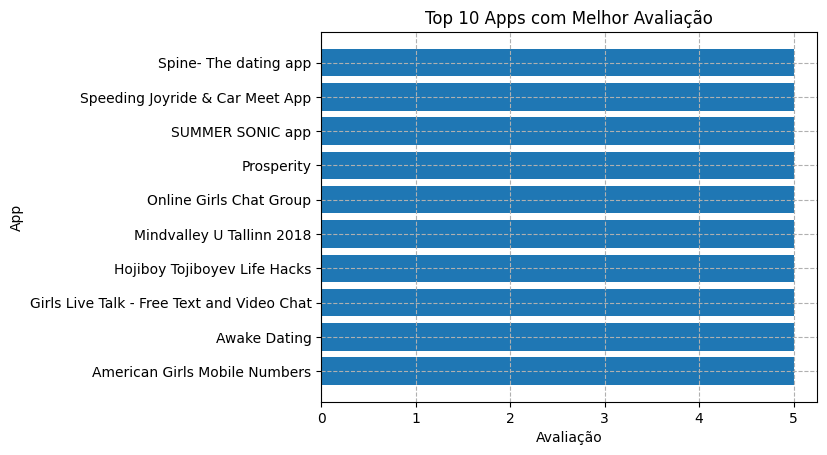

In [203]:
plt.barh(top_10_melhores_apps['App'], top_10_melhores_apps['Rating'])

plt.title('Top 10 Apps com Melhor Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('App')
plt.grid(linestyle='--')
plt.show()